# <center><h1><B>COVID 19</B><h1><center>

    Coronavirus disease 2019 (COVID‑19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).[9] It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic.[10][11] As of 22 August 2020, more than 22.9 million cases have been reported across 188 countries and territories, resulting in more than 799,000 deaths. More than 14.7 million people have recovered.

    Most common symptoms:
    (1) fever
    (2) dry cough
    (3) tiredness

    Less common symptoms:
    (1) aches and pains
    (2) sore throat
    (3) diarrhoea
    (4) conjunctivitis
    (5) headache
    (6) loss of taste or smell
    (7) a rash on skin, or discolouration of fingers or toes

<img src="covid 19.jpg" width=500 height=500 />

  # IMPORT LIBRARY

In [41]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

# IMPORT DATA 

In [42]:
world_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
world_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
world_recover = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# EXPLORE DATA

In [43]:
world_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,240,245,250,254,259,263,266,271,275,280
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,94,94,96,100,102,103,105,106,107,107


In [44]:
world_confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624


In [45]:
world_recover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,28587,28874,29142,29369,29587,29886,30157,30436,30717,30978
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,875,875,875,877,877,893,893,902,902,902
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,804,814,818,877,977,977,1335,1028,1041,1063


In [46]:
# CLEANING THE DATA SO WE CAN USE EASILY
column_date=world_confirm.keys()
confirms=world_confirm.loc[:,column_date[4]:column_date[-1]]
deaths=world_deaths.loc[:,column_date[4]:column_date[-1]]
recovered=world_recover.loc[:,column_date[4]:column_date[-1]]

In [47]:
date=confirms.keys()

# total cases,deaths and recovery per day

In [48]:
total_cases=[]
total_death=[]
total_recovered=[]
total_active=[]
mortality_rate=[]
recovery_rate=[]
sum_comfirmed=0
for i in date:
    sum_confirmed=confirms[i].sum()
    sum_deaths=deaths[i].sum()
    sum_recovered=recovered[i].sum()
    sum_active=sum_confirmed-sum_deaths-sum_recovered
    
    # total cases,deaths and recovered
    total_cases.append(sum_confirmed)
    total_death.append(sum_deaths)
    total_recovered.append(sum_recovered)
    total_active.append(sum_active)
    
    #recovery and mortality rate
    mortality_rate.append(sum_deaths/sum_confirmed)
    recovery_rate.append(sum_recovered/sum_confirmed)
    

    

In [49]:
# Function to find daily increase cases  and find rolling avearage
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average


## avearage daily cases ,deaths and recovery

In [50]:
world_daily_increase=daily_increase(total_cases)
world_confirmed_avg= moving_average(total_cases, 7)
world_daily_increase_avg = moving_average(world_daily_increase,7)

world_daily_deaths=daily_increase(total_death)
world_deaths_avg= moving_average(total_death, 7)
world_daily_deaths_avg = moving_average(world_daily_deaths,7)

world_daily_recovered=daily_increase(total_recovered)
world_recovered_avg= moving_average(total_recovered, 7)
world_daily_recovered_avg = moving_average(world_daily_recovered,7)

world_active_avg = moving_average(total_active, 7)

In [51]:
#convert list in array in reshape so we can easily use in visulization
index = np.array([i for i in range(len(date))])
total_cases = np.array(total_cases).reshape(-1, 1)
total_death = np.array(total_death).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# visulization

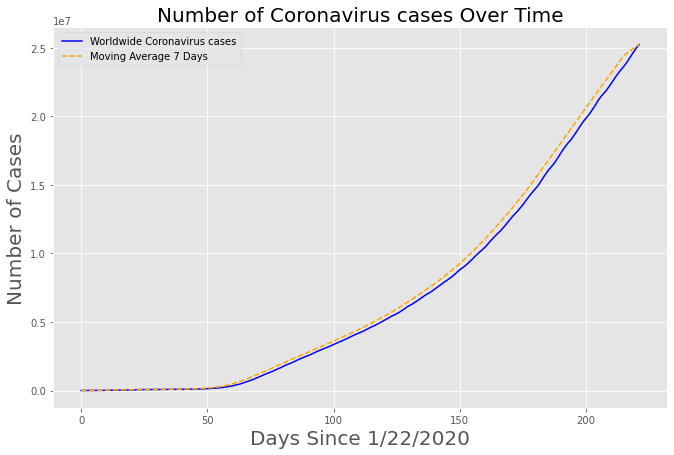

In [52]:
plt.style.use("ggplot")
plt.figure(figsize=(11,7))
plt.plot(index,total_cases,color="Blue")
plt.plot(index,world_confirmed_avg,linestyle="dashed",color="orange")
plt.title('Number of Coronavirus cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Worldwide Coronavirus cases', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

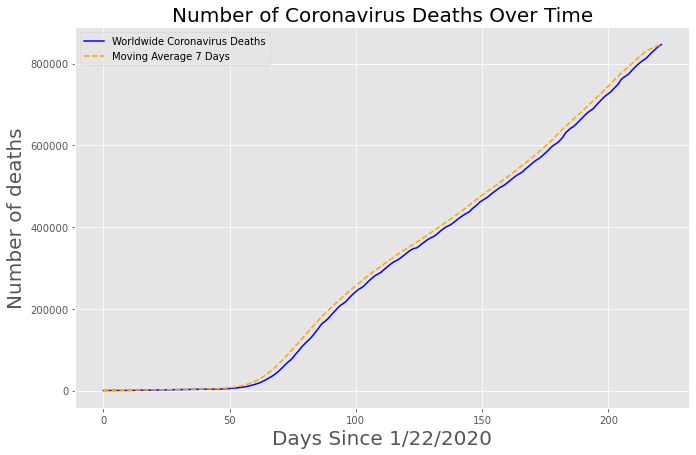

In [15]:
plt.figure(figsize=(11,7))
plt.plot(index,total_death,color="Blue")
plt.plot(index,world_deaths_avg,linestyle="dashed",color="orange")
plt.title('Number of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of deaths', size=20)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

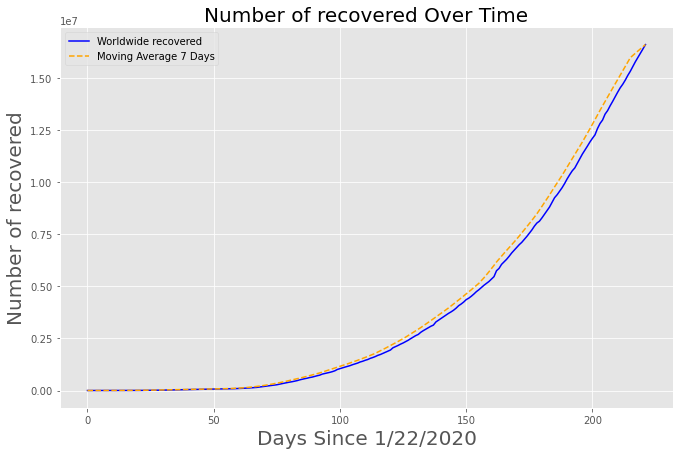

In [16]:
plt.figure(figsize=(11,7))
plt.plot(index,total_recovered,color="blue")
plt.plot(index,world_recovered_avg,linestyle="dashed",color="orange")
plt.title('Number of recovered Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of recovered', size=20)
plt.legend(['Worldwide recovered', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

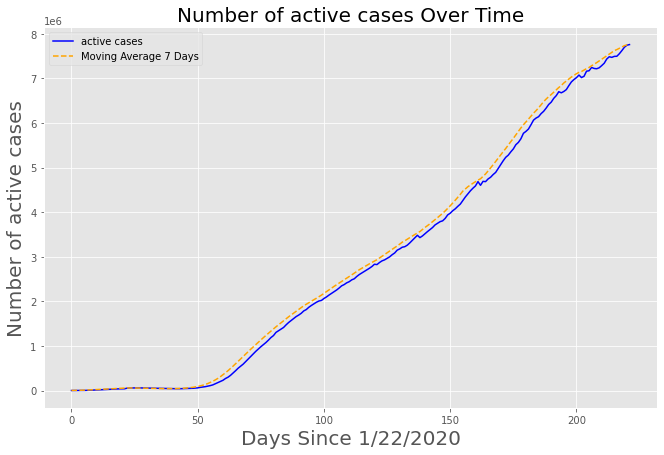

In [17]:
plt.figure(figsize=(11,7))
plt.plot(index,total_active,color="blue")
plt.plot(index,world_active_avg,linestyle="dashed",color="orange")
plt.title('Number of active cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of active cases', size=20)
plt.legend(['active cases', 'Moving Average 7 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

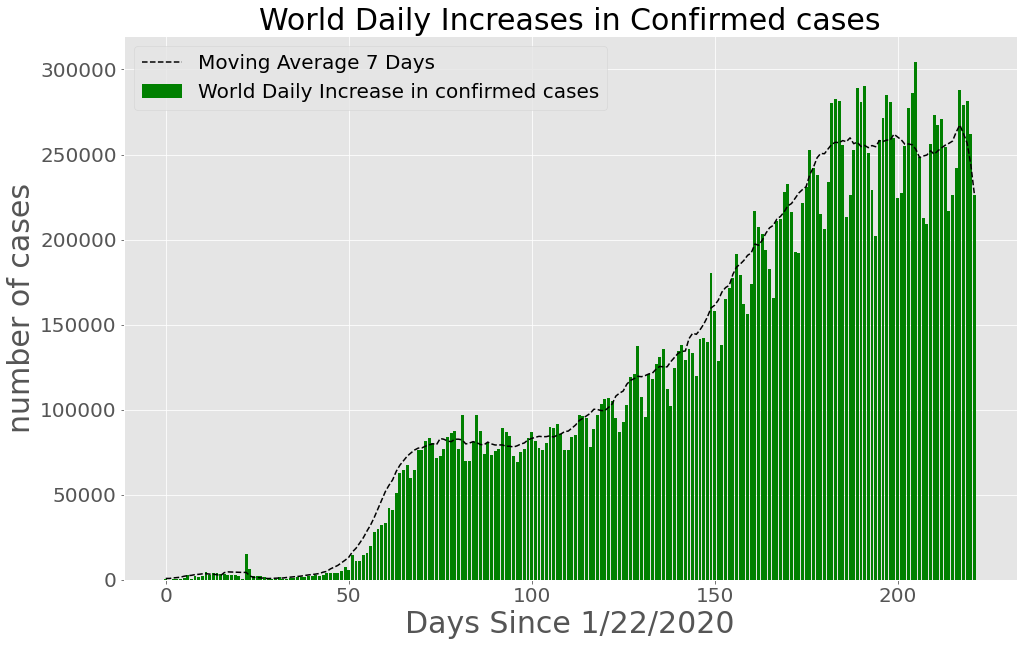

In [18]:
plt.figure(figsize=(16, 10))
plt.bar(index, world_daily_increase,color='green')
plt.plot(index, world_daily_increase_avg, color='black', linestyle='dashed')
plt.title('World Daily Increases in Confirmed cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('number of cases', size=30)
plt.legend(['Moving Average 7 Days', 'World Daily Increase in confirmed cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

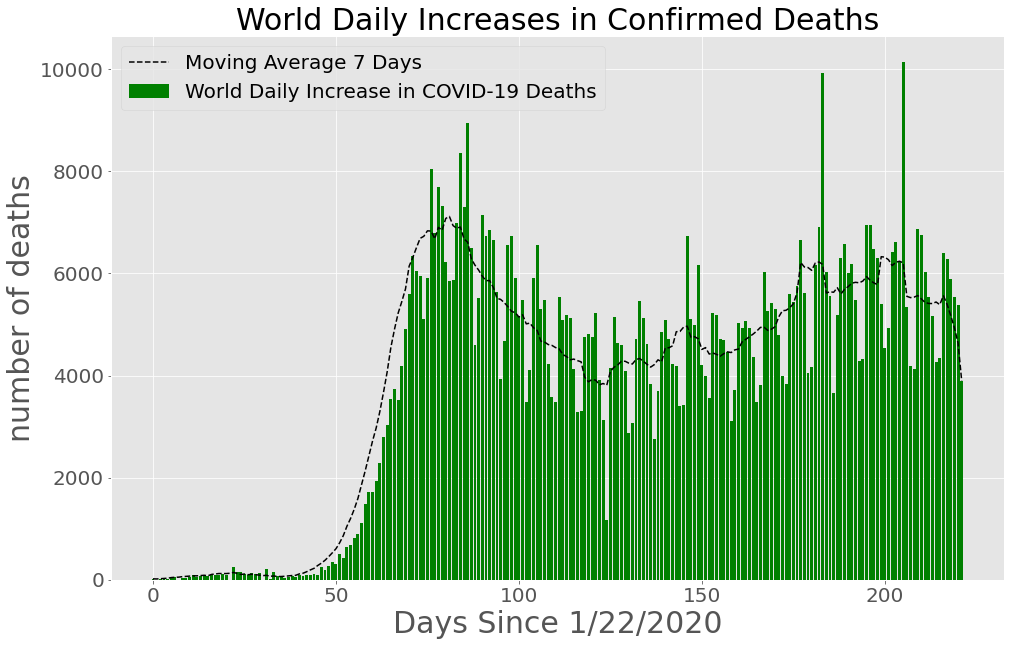

In [19]:
plt.figure(figsize=(16, 10))
plt.bar(index, world_daily_deaths,color='green')
plt.plot(index, world_daily_deaths_avg, color='black', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('number of deaths', size=30)
plt.legend(['Moving Average 7 Days', 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

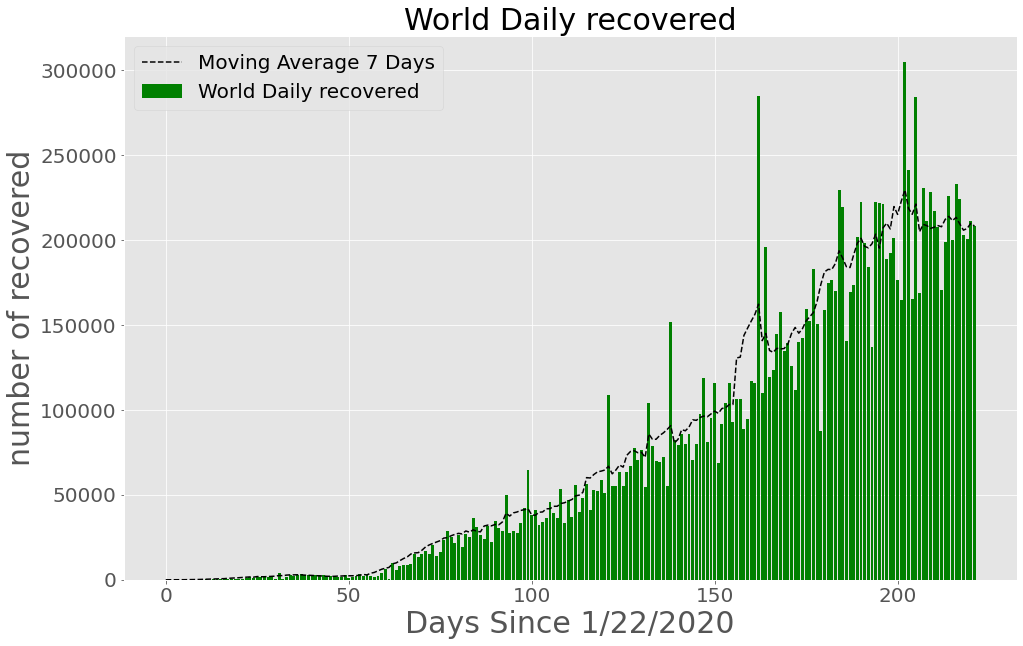

In [20]:
plt.figure(figsize=(16, 10))
plt.bar(index, world_daily_recovered,color='green')
plt.plot(index, world_daily_recovered_avg, color='black', linestyle='dashed')
plt.title('World Daily recovered', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('number of recovered', size=30)
plt.legend(['Moving Average 7 Days', 'World Daily recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Text(0.5, 1.0, 'confirmed cases,deaths,recovery over Time')

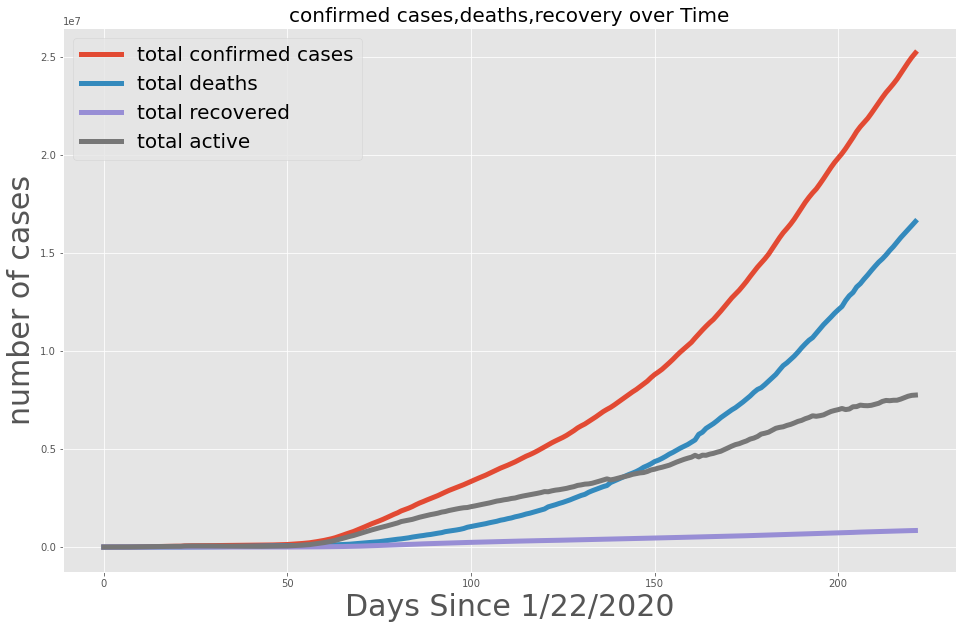

In [54]:
plt.figure(figsize=(16,10))
plt.plot(index,total_cases, linewidth=5)
plt.plot(index,total_recovered,linewidth=5)
plt.plot(index,total_death, linewidth=5)
plt.plot(index,total_active, linewidth=5)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('number of cases', size=30)
plt.legend(["total confirmed cases","total deaths","total recovered","total active"],prop={'size' : 20})
plt.title('confirmed cases,deaths,recovery over Time', size=20)

In [22]:
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'Peru', 'Mexico', 'Colombia','Afghanistan'] 

In [34]:
window=7
def country_info(country):
    confirms_country=[]
    deaths_country=[]
    recovered_country=[]
    for i in date:
        column_date=world_confirm.keys()
        confirms_country.append(world_confirm[world_confirm["Country/Region"]==country][i].sum())
        deaths_country.append(world_deaths[world_deaths["Country/Region"]==country][i].sum())
        recovered_country.append(world_recover[world_recover["Country/Region"]==country][i].sum())
    return (confirms_country,deaths_country,recovered_country)

def country_plot(x, y1, y2, y3, y4, country):
    window==7
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='BLACK', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2, color='Green')
    plt.plot(x, confirmed_increase_avg, color='BLACK', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3, color='Green')
    plt.plot(x, death_increase_avg, color='BLACK', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4, color='Green')
    plt.plot(x, recovery_increase_avg, color='BLACK', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    
def visulization_info(country):
    get_country_info=country_info(country)
    confirms_country=get_country_info[0]
    deaths_country=get_country_info[1]
    recovered_country=get_country_info[2]
    
    country_daily_increase=daily_increase(confirms_country)
    country_daily_death = daily_increase(deaths_country)
    country_daily_recovery = daily_increase(recovered_country)
    
    country_plot(index,confirms_country,country_daily_increase,country_daily_death,country_daily_recovery,country)
    


<B><center><h2> INDIA</h2></center></B>

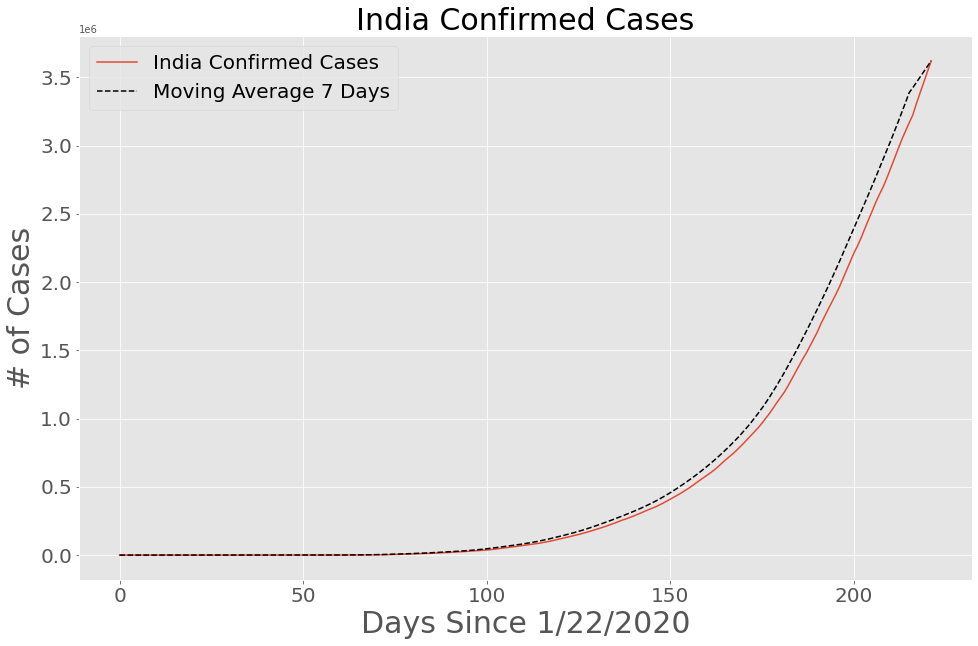

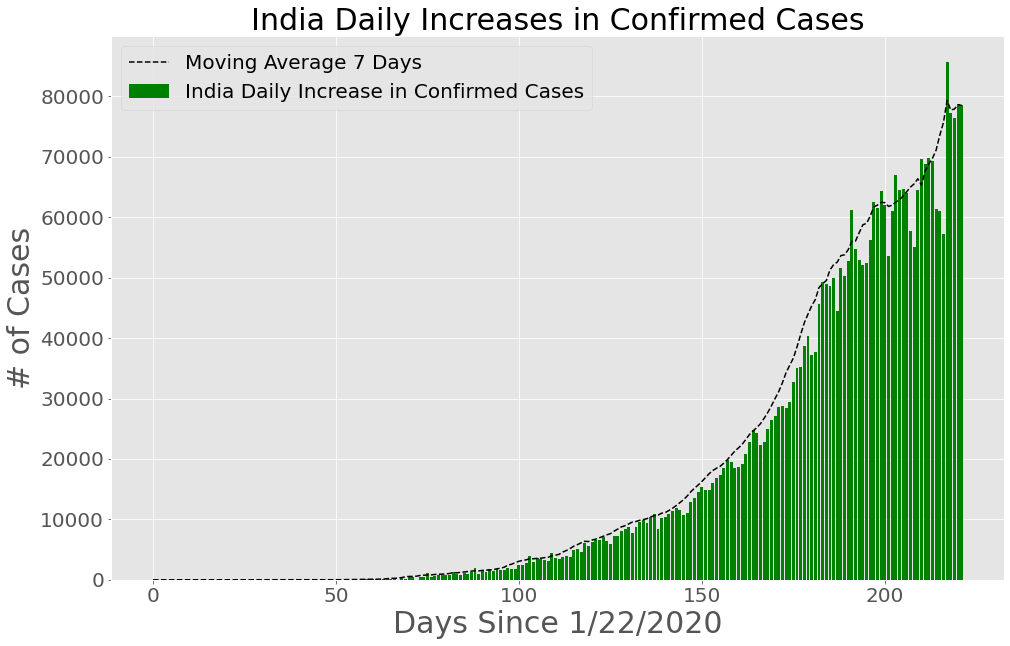

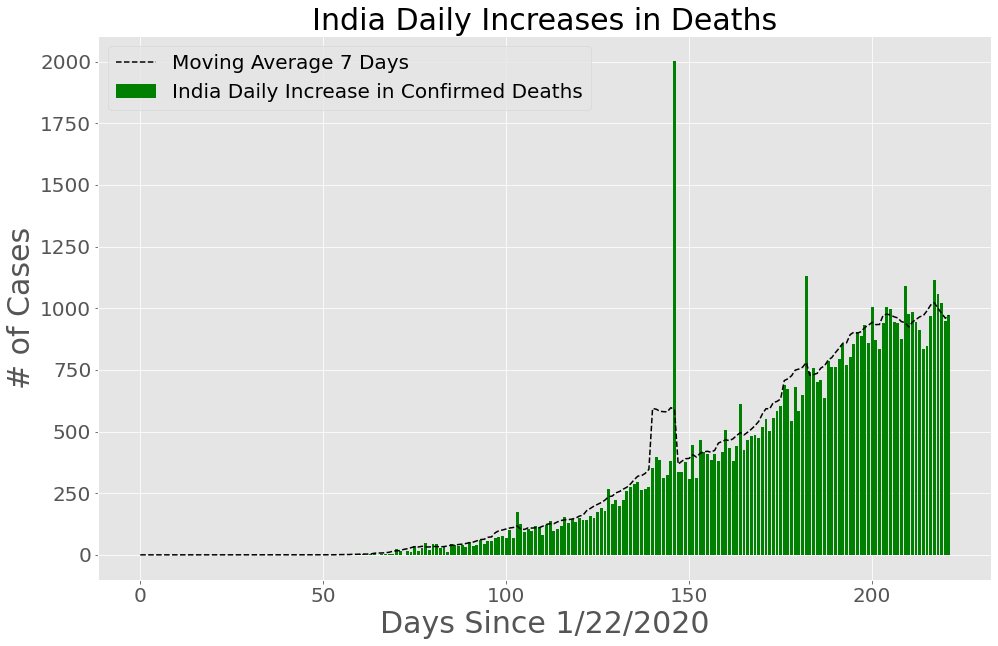

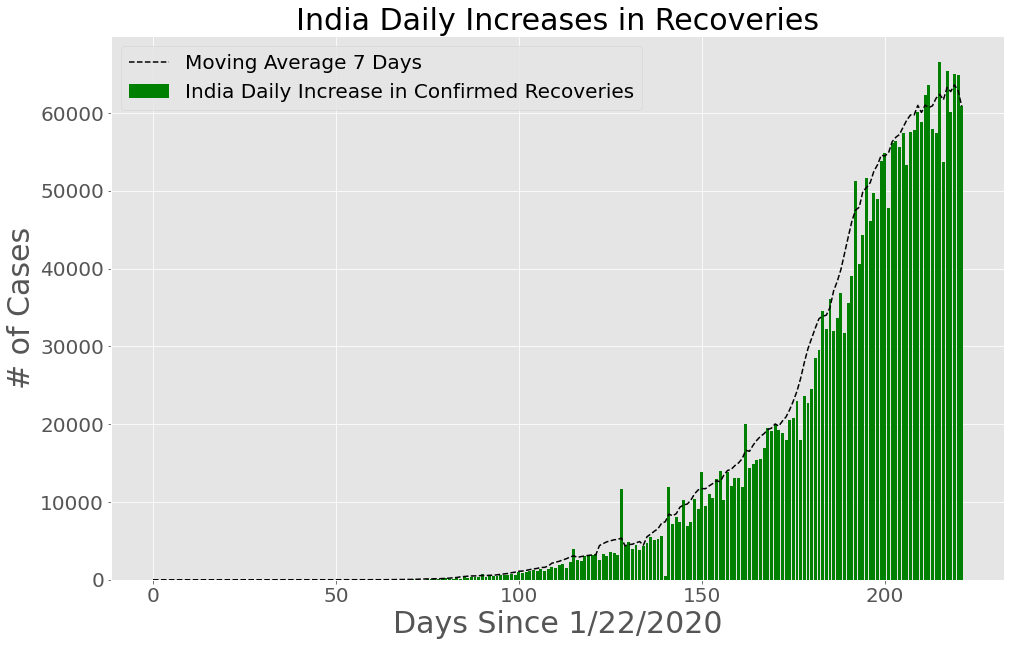

In [35]:
visulization_info(countries[2])

<B><center><h2>UNITED STATE</h2></center></B>

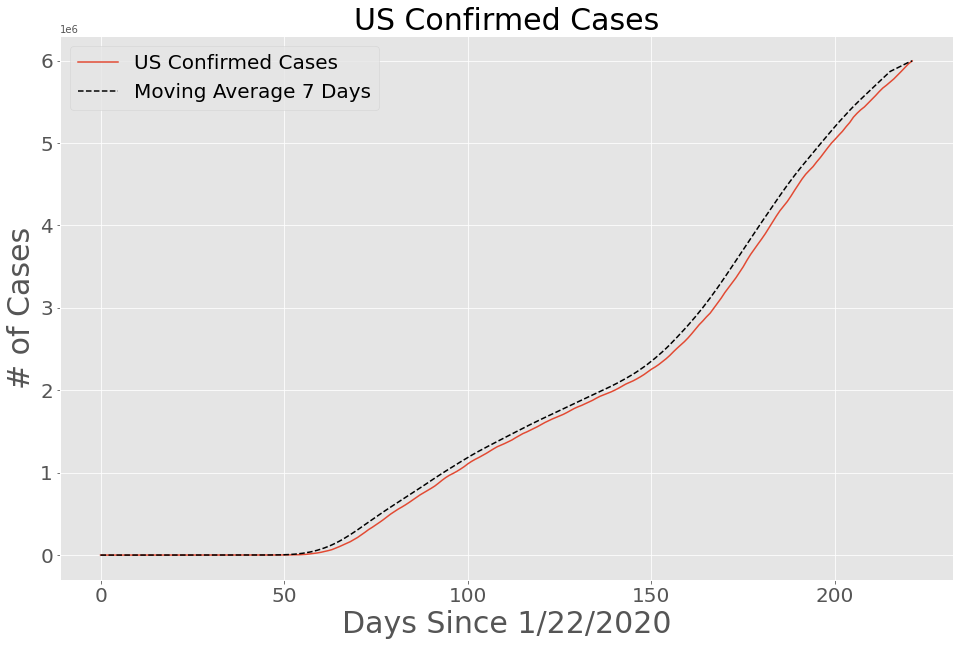

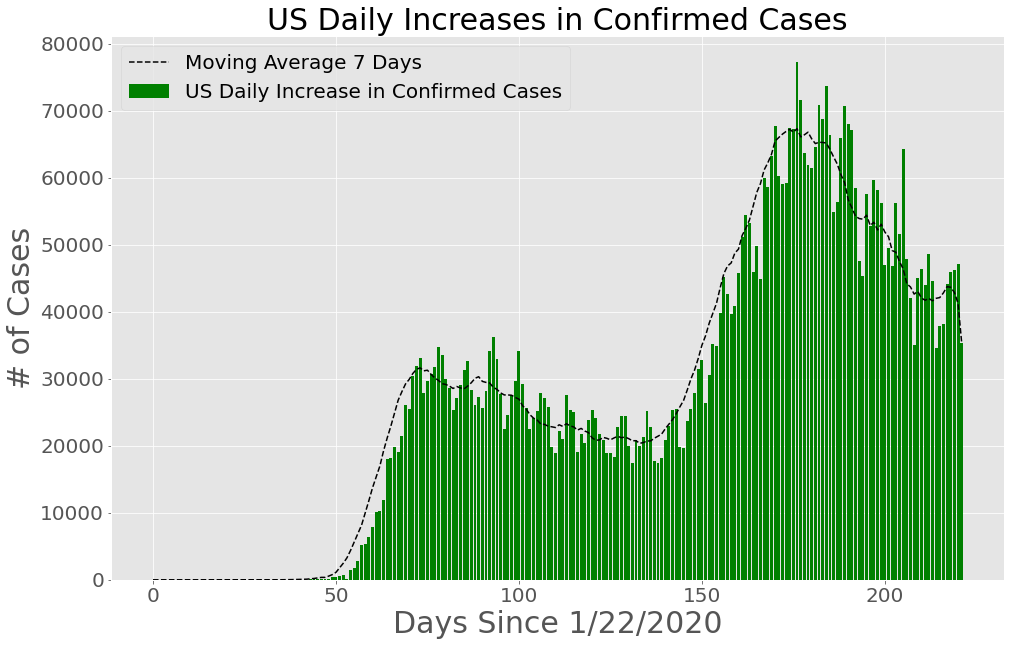

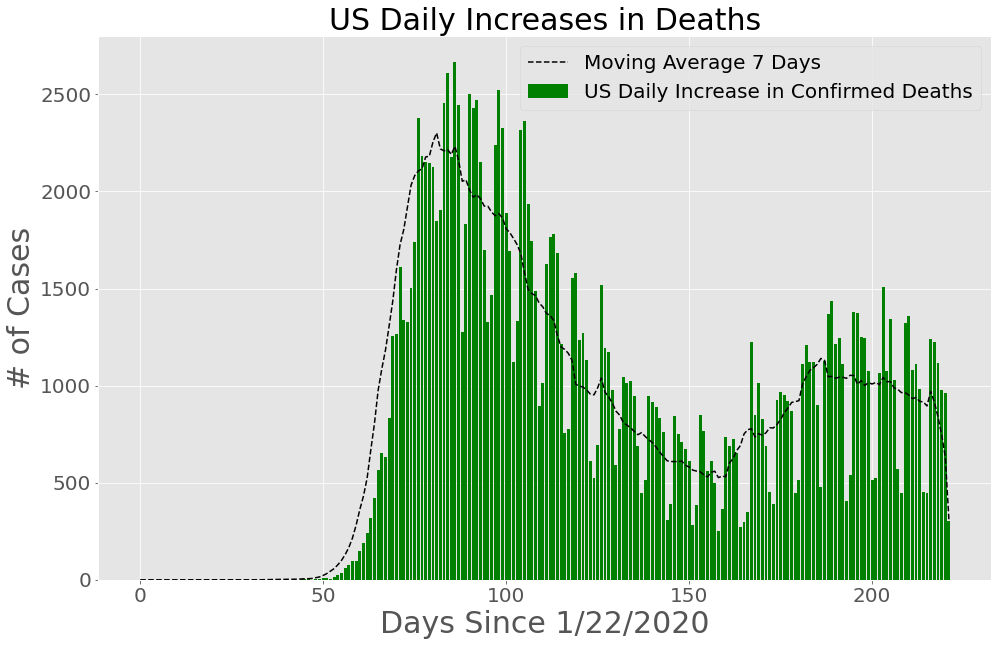

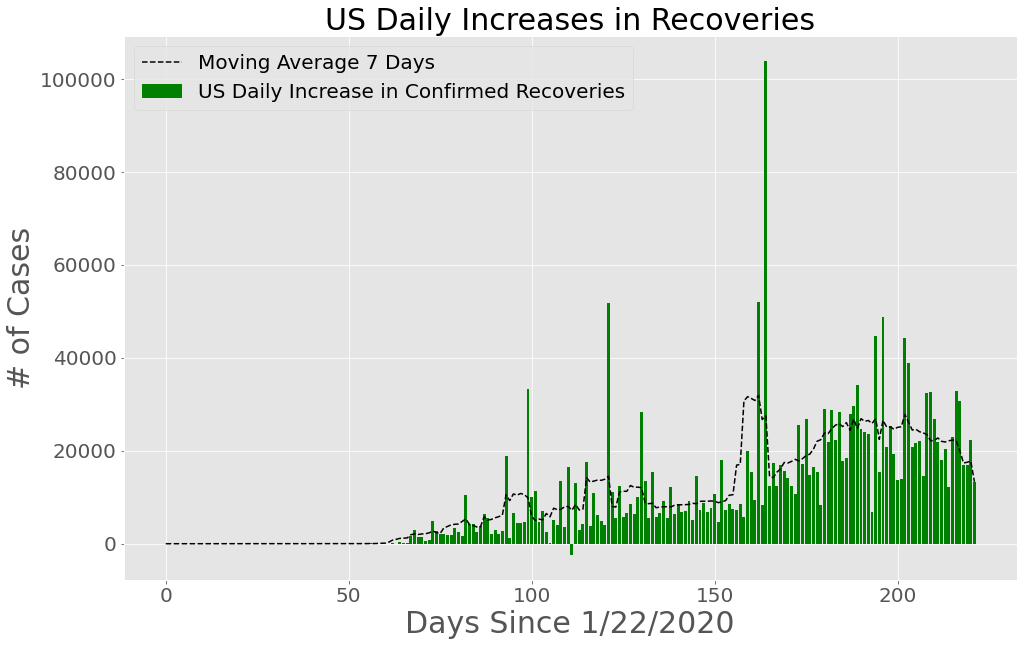

In [39]:
visulization_info(countries[0])

<B><center><h2>BRAZIL</h2></center></B>

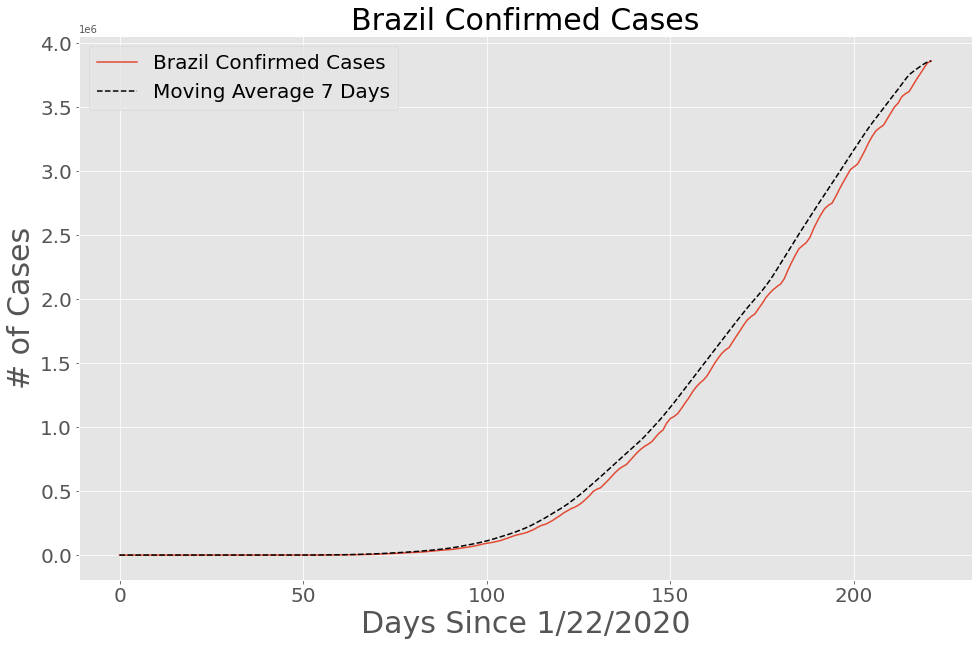

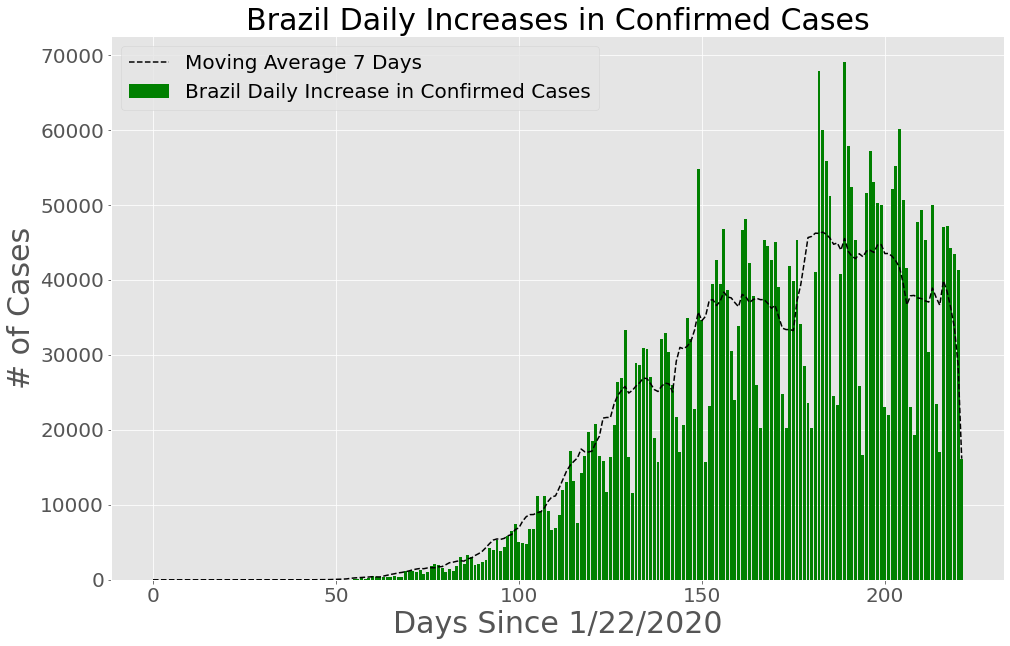

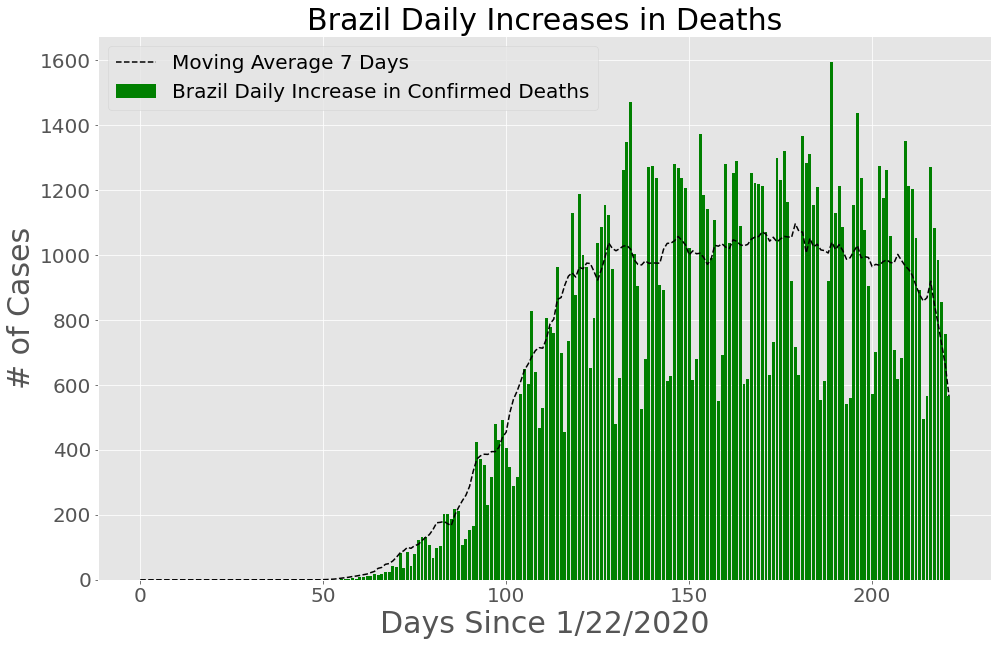

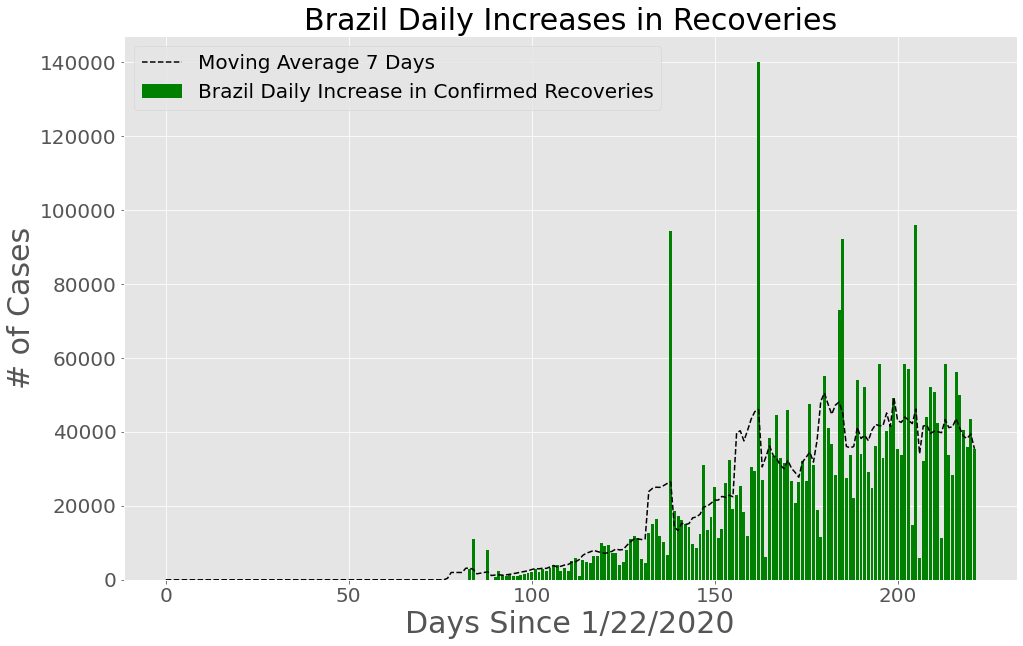

In [40]:
visulization_info(countries[3])

 # <center>END</center>